In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [2]:
df_COP26 = pd.read_excel(r"C:\Users\PsyLab-9221\Documents\thesis\ENGO-emotional-framing\data\results_file_cop26_sentiment+Relevance+Group_new_240624_split_1.xlsx")
df_COP27 = pd.read_excel(r"C:\Users\PsyLab-9221\Documents\thesis\ENGO-emotional-framing\data\results_file_cop27_sentiment+Relevance+Group_new_240624_split_1.xlsx")

In [3]:
df_COP26_relevance = df_COP26[df_COP26['Relevant'] == 1].copy()
df_COP27_relevance = df_COP27[df_COP27['Relevant'] == 1].copy()

In [4]:
df_COP26_relevance[['date', 'hour']] = df_COP26_relevance['created_at'].str.split(" ", expand = True)
df_COP27_relevance[['date', 'hour']] = df_COP27['created_at'].str.split(" ", expand = True)
df_COP26_relevance['date'] = pd.to_datetime(df_COP26_relevance['date'])
df_COP27_relevance['date'] = pd.to_datetime(df_COP27_relevance['date'])

In [5]:
df_COP26_relevance.head()

,label_old,score,tweet,handle,Name,created_at,Relevant,Group,label,score_new,date,hour
0,negative,0.953093,RT @denisegrab: NEW report: Gas appliances in ...,CarbnNtrlCities,Carbon Neutral Cities Alliance,2021-11-18 20:12:42+00:00,1,3,negative,0.914069,2021-11-18,20:12:42+00:00
1,positive,0.918934,RT @Michael_Shank: Appreciate your constant le...,CarbnNtrlCities,Carbon Neutral Cities Alliance,2021-11-18 15:51:35+00:00,1,3,positive,0.800574,2021-11-18,15:51:35+00:00
2,neutral,0.515838,CNCA Member San Francisco is reducing #waste &...,CarbnNtrlCities,Carbon Neutral Cities Alliance,2021-11-17 22:14:58+00:00,1,3,neutral,0.531673,2021-11-17,22:14:58+00:00
3,neutral,0.755760,What needs to happen to go #CarbonNeutral?\nCh...,CarbnNtrlCities,Carbon Neutral Cities Alliance,2021-11-17 00:33:39+00:00,1,3,neutral,0.962487,2021-11-17,00:33:39+00:00
4,neutral,0.846860,RT @Michael_Shank: What we're reading @CarbnNt...,CarbnNtrlCities,Carbon Neutral Cities Alliance,2021-11-16 20:16:18+00:00,1,3,neutral,0.966936,2021-11-16,20:16:18+00:00


In [6]:
# adding different sentiment columns for COP26
df_COP26_relevance['Positive'] = (df_COP26_relevance['label'] == 'positive').astype(int)
df_COP26_relevance['Negative'] = (df_COP26_relevance['label'] == 'negative').astype(int)
df_COP26_relevance['Neutral'] = (df_COP26_relevance['label'] == 'neutral').astype(int)
# adding different sentiment columns for COP27
df_COP27_relevance['Positive'] = (df_COP27_relevance['label'] == 'positive').astype(int)
df_COP27_relevance['Negative'] = (df_COP27_relevance['label'] == 'negative').astype(int)
df_COP27_relevance['Neutral'] = (df_COP27_relevance['label'] == 'neutral').astype(int)

In [7]:
COP26_grouped_df = df_COP26_relevance.groupby(['date', 'Name', 'Group']).agg({
    'Positive': 'sum',
    'Negative': 'sum',
    'Neutral': 'sum'
}).reset_index()

In [8]:
COP27_grouped_df = df_COP27_relevance.groupby(['date', 'Name', 'Group']).agg({
    'Positive': 'sum',
    'Negative': 'sum',
    'Neutral': 'sum'
}).reset_index()

In [9]:
COP26_grouped_df

,date,Name,Group,Positive,Negative,Neutral
0,2021-10-23,A Rocha,2,1,0,0
1,2021-10-23,African Youth Initiative on Climate Change,3,0,0,1
2,2021-10-23,Captain Planet Foundation,4,0,0,2
3,2021-10-23,Catholic Youth Network for Environmental Susta...,1,1,0,1
4,2021-10-23,"Centre for Development and Environment, Bern",4,0,0,1
...,...,...,...,...,...,...
3390,2021-11-19,World Wide Fund for Nature,1,1,0,1
3391,2021-11-19,World?s Youth for Climate Justice,4,0,0,4
3392,2021-11-19,"Wuppertal Institute for Climate, Environment a...",2,0,0,5
3393,2021-11-19,Young Friends of the Earth Europe,1,1,1,3


In [10]:
COP26_grouped_df['negative_percent'] = COP26_grouped_df.apply(lambda row : ((row['Negative']) / (row['Negative'] + row['Neutral'] + row['Positive'])) * 100, axis = 1)

COP26_grouped_df['neutral_percent'] = COP26_grouped_df.apply(lambda row : ((row['Neutral']) / (row['Negative'] + row['Neutral'] + row['Positive'])) * 100, axis = 1)

COP26_grouped_df['positive_percent'] = COP26_grouped_df.apply(lambda row : ((row['Positive']) / (row['Negative'] + row['Neutral'] + row['Positive'])) * 100, axis = 1)

In [11]:
COP27_grouped_df['negative_percent'] = COP27_grouped_df.apply(lambda row : ((row['Negative']) / (row['Negative'] + row['Neutral'] + row['Positive'])) * 100, axis = 1)

COP27_grouped_df['neutral_percent'] = COP27_grouped_df.apply(lambda row : ((row['Neutral']) / (row['Negative'] + row['Neutral'] + row['Positive'])) * 100, axis = 1)

COP27_grouped_df['positive_percent'] = COP27_grouped_df.apply(lambda row : ((row['Positive']) / (row['Negative'] + row['Neutral'] + row['Positive'])) * 100, axis = 1)

In [12]:
COP27_grouped_df

,date,Name,Group,Positive,Negative,Neutral,negative_percent,neutral_percent,positive_percent
0,2022-10-29,350.org,1,0,1,3,25.0,75.0,0.0
1,2022-10-29,Alliance for a Green Revolution in Africa,2,0,0,2,0.0,100.0,0.0
2,2022-10-29,Biofuelwatch,4,0,1,1,50.0,50.0,0.0
3,2022-10-29,Center for International Environmental Law,2,0,2,6,25.0,75.0,0.0
4,2022-10-29,Circle of Blue,4,0,1,1,50.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...
3288,2022-11-25,Women's Environmental Network,4,1,0,0,0.0,0.0,100.0
3289,2022-11-25,World Business Council for Sustainable Develop...,2,0,0,3,0.0,100.0,0.0
3290,2022-11-25,World Green Building Council,2,0,0,2,0.0,100.0,0.0
3291,2022-11-25,"Wuppertal Institute for Climate, Environment a...",2,0,0,3,0.0,100.0,0.0


In [13]:
COP26_grouped_df['day_number'] = COP26_grouped_df['date'].rank(method='dense').astype(int)
COP27_grouped_df['day_number'] = COP27_grouped_df['date'].rank(method='dense').astype(int)

In [14]:
# Adding day column
COP26_grouped_df['day'] = COP26_grouped_df['date'].dt.strftime('%d-%m')
COP27_grouped_df['day'] = COP27_grouped_df['date'].dt.strftime('%d-%m')

In [15]:
# Calculate Sentiment Index
COP26_grouped_df['Sentiment Index'] = (COP26_grouped_df['Positive'] - COP26_grouped_df['Negative']) / (COP26_grouped_df['Positive'] + COP26_grouped_df['Negative'] + COP26_grouped_df['Neutral'])
COP27_grouped_df['Sentiment Index'] = (COP27_grouped_df['Positive'] - COP27_grouped_df['Negative']) / (COP27_grouped_df['Positive'] + COP27_grouped_df['Negative'] + COP27_grouped_df['Neutral'])

In [16]:
# Calculate sum_twits
COP26_grouped_df['sum_twits'] = COP26_grouped_df['Positive'] + COP26_grouped_df['Negative'] + COP26_grouped_df['Neutral']
COP27_grouped_df['sum_twits'] = COP27_grouped_df['Positive'] + COP27_grouped_df['Negative'] + COP27_grouped_df['Neutral']

In [17]:
COP26_grouped_df

,date,Name,Group,Positive,Negative,Neutral,negative_percent,neutral_percent,positive_percent,day_number,day,Sentiment Index,sum_twits
0,2021-10-23,A Rocha,2,1,0,0,0.0,0.0,100.0,1,23-10,1.0,1
1,2021-10-23,African Youth Initiative on Climate Change,3,0,0,1,0.0,100.0,0.0,1,23-10,0.0,1
2,2021-10-23,Captain Planet Foundation,4,0,0,2,0.0,100.0,0.0,1,23-10,0.0,2
3,2021-10-23,Catholic Youth Network for Environmental Susta...,1,1,0,1,0.0,50.0,50.0,1,23-10,0.5,2
4,2021-10-23,"Centre for Development and Environment, Bern",4,0,0,1,0.0,100.0,0.0,1,23-10,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,2021-11-19,World Wide Fund for Nature,1,1,0,1,0.0,50.0,50.0,28,19-11,0.5,2
3391,2021-11-19,World?s Youth for Climate Justice,4,0,0,4,0.0,100.0,0.0,28,19-11,0.0,4
3392,2021-11-19,"Wuppertal Institute for Climate, Environment a...",2,0,0,5,0.0,100.0,0.0,28,19-11,0.0,5
3393,2021-11-19,Young Friends of the Earth Europe,1,1,1,3,20.0,60.0,20.0,28,19-11,0.0,5


In [18]:
COP27_grouped_df['sum_twits'].describe()

count    3293.000000
mean        5.205588
std         8.615342
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       118.000000
Name: sum_twits, dtype: float64

In [19]:
# COP26_grouped_df.to_excel('COP26_grouped_df.xlsx', index = False)
# files.download('COP26_grouped_df.xlsx')

# COP27_grouped_df.to_excel('COP27_grouped_df.xlsx', index = False)
# files.download('COP27_grouped_df.xlsx')

In [20]:
COP26_grouped_df_1 = COP26_grouped_df[COP26_grouped_df['Group'] == 1]
COP26_grouped_df_2 = COP26_grouped_df[COP26_grouped_df['Group'] == 2]
COP26_grouped_df_3 = COP26_grouped_df[COP26_grouped_df['Group'] == 3]
COP26_grouped_df_4 = COP26_grouped_df[COP26_grouped_df['Group'] == 4]


COP27_grouped_df_1 = COP27_grouped_df[COP27_grouped_df['Group'] == 1]
COP27_grouped_df_2 = COP27_grouped_df[COP27_grouped_df['Group'] == 2]
COP27_grouped_df_3 = COP27_grouped_df[COP27_grouped_df['Group'] == 3]
COP27_grouped_df_4 = COP27_grouped_df[COP27_grouped_df['Group'] == 4]

In [21]:
COP26_grouped_grouped_df_1 = COP26_grouped_df_1.groupby('date').mean('Sentiment Index').reset_index()
COP26_grouped_grouped_df_2 = COP26_grouped_df_2.groupby('date').mean('Sentiment Index').reset_index()
COP26_grouped_grouped_df_3 = COP26_grouped_df_3.groupby('date').mean('Sentiment Index').reset_index()
COP26_grouped_grouped_df_4 = COP26_grouped_df_4.groupby('date').mean('Sentiment Index').reset_index()

COP27_grouped_grouped_df_1 = COP27_grouped_df_1.groupby('date').mean('Sentiment Index').reset_index()
COP27_grouped_grouped_df_2 = COP27_grouped_df_2.groupby('date').mean('Sentiment Index').reset_index()
COP27_grouped_grouped_df_3 = COP27_grouped_df_3.groupby('date').mean('Sentiment Index').reset_index()
COP27_grouped_grouped_df_4 = COP27_grouped_df_4.groupby('date').mean('Sentiment Index').reset_index()

In [22]:
data_sets_cop26 = [COP26_grouped_grouped_df_1, COP26_grouped_grouped_df_2, COP26_grouped_grouped_df_3, COP26_grouped_grouped_df_4]
data_sets_cop27 = [COP27_grouped_grouped_df_1, COP27_grouped_grouped_df_2, COP27_grouped_grouped_df_3, COP27_grouped_grouped_df_4]

In [23]:
COP26_grouped_grouped_df = COP26_grouped_df.groupby('date').mean('Sentiment Index').reset_index()

In [24]:
COP27_grouped_grouped_df = COP27_grouped_df.groupby('date').mean('Sentiment Index').reset_index()

In [25]:
COP27_grouped_grouped_df['date'] = COP26_grouped_grouped_df['date']

In [26]:
COP27_grouped_grouped_df['date']

0    2021-10-23
1    2021-10-24
2    2021-10-25
3    2021-10-26
4    2021-10-27
5    2021-10-28
6    2021-10-29
7    2021-10-30
8    2021-10-31
9    2021-11-01
10   2021-11-02
11   2021-11-03
12   2021-11-04
13   2021-11-05
14   2021-11-06
15   2021-11-07
16   2021-11-08
17   2021-11-09
18   2021-11-10
19   2021-11-11
20   2021-11-12
21   2021-11-13
22   2021-11-14
23   2021-11-15
24   2021-11-16
25   2021-11-17
26   2021-11-18
27   2021-11-19
Name: date, dtype: datetime64[ns]

In [27]:
COP26_grouped_df.isna().sum()

date                0
Name                0
Group               0
Positive            0
Negative            0
Neutral             0
negative_percent    0
neutral_percent     0
positive_percent    0
day_number          0
day                 0
Sentiment Index     0
sum_twits           0
dtype: int64

In [28]:
COP26_grouped_df[COP26_grouped_df['Group'] == 1]

,date,Name,Group,Positive,Negative,Neutral,negative_percent,neutral_percent,positive_percent,day_number,day,Sentiment Index,sum_twits
3,2021-10-23,Catholic Youth Network for Environmental Susta...,1,1,0,1,0.000000,50.000000,50.0,1,23-10,0.500000,2
19,2021-10-23,Friends of the Earth Europe,1,0,2,2,50.000000,50.000000,0.0,1,23-10,-0.500000,4
20,2021-10-23,Friends of the Earth International,1,0,3,1,75.000000,25.000000,0.0,1,23-10,-0.750000,4
22,2021-10-23,Global Commission on Adaptation,1,0,0,8,0.000000,100.000000,0.0,1,23-10,0.000000,8
25,2021-10-23,Go Green Initiative,1,0,1,0,100.000000,0.000000,0.0,1,23-10,-1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,2021-11-19,Stockholm Environment Institute,1,0,1,2,33.333333,66.666667,0.0,28,19-11,-0.333333,3
3378,2021-11-19,The Nature Conservancy,1,7,0,1,0.000000,12.500000,87.5,28,19-11,0.875000,8
3383,2021-11-19,Wildlife Conservation Society,1,1,0,1,0.000000,50.000000,50.0,28,19-11,0.500000,2
3390,2021-11-19,World Wide Fund for Nature,1,1,0,1,0.000000,50.000000,50.0,28,19-11,0.500000,2


In [29]:
# COP26_grouped_df.to_excel('COP26_grouped_df.xlsx', index = False)
# files.download('COP26_grouped_df.xlsx')

In [30]:
# COP27_grouped_df.to_excel('COP27_grouped_df.xlsx', index = False)
# files.download('COP27_grouped_df.xlsx')

In [31]:
data_sets = [COP26_grouped_grouped_df, COP27_grouped_grouped_df]

In [32]:
events_cop26 = {'2021-10-31': 'COP26 start',
          '2021-11-06': 'Demonstrations',
          '2021-11-13': 'COP26 ends'}

In [33]:
events_cop27 = {'2022-11-06': 'COP27 start',
          '2022-11-12': 'Demonstrations',
          '2022-11-20': 'COP27 ends'}

In [34]:
events = {'2021-10-31': 'COP start',
          '2021-11-06': 'Demonstrations',
          '2021-11-13': 'COP ends'}

# Creating Plots

In [35]:
sys.path.append(os.path.abspath('..'))

In [36]:
from src.plots import plot_sentiment_comparison3

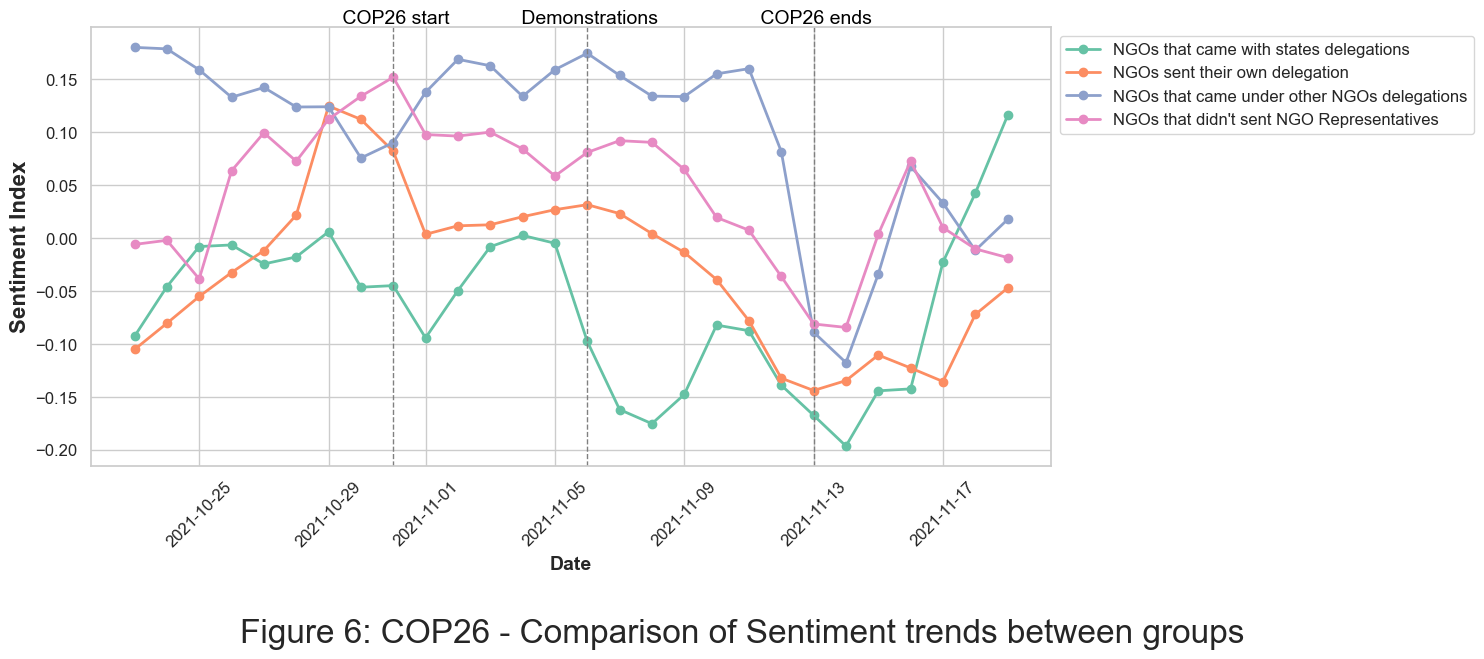

In [37]:
plot_sentiment_comparison3(data_sets_cop26,
                           title='Figure 6: COP26 - Comparison of Sentiment trends between groups',
                           sentiment_type="Sentiment Index",
                           date_column="date",
                           legend_names=['NGOs that came with states delegations', 'NGOs sent their own delegation', 'NGOs that came under other NGOs delegations', "NGOs that didn't sent NGO Representatives"],
                           events = events_cop26,
                           moving_avg_window=3)

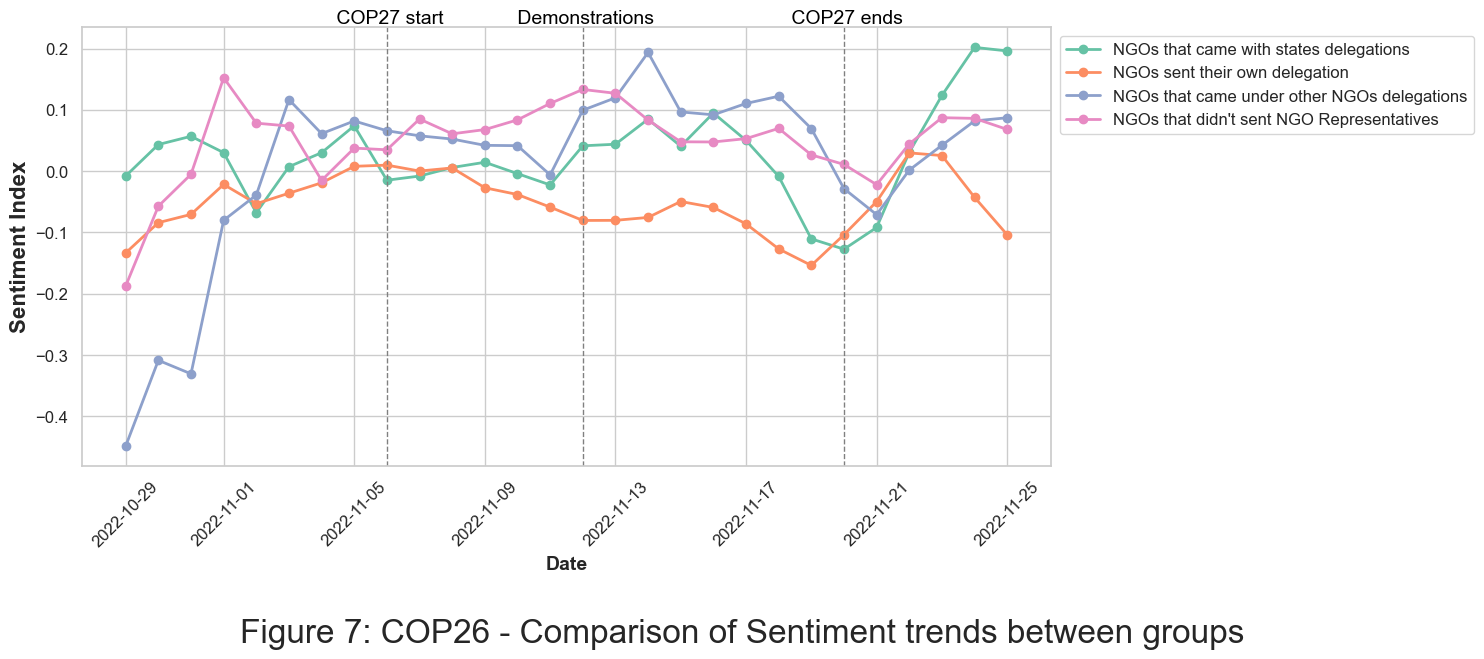

In [38]:
plot_sentiment_comparison3(data_sets_cop27,
                           title='Figure 7: COP26 - Comparison of Sentiment trends between groups',
                           sentiment_type="Sentiment Index",
                           date_column="date",
                           legend_names=['NGOs that came with states delegations', 'NGOs sent their own delegation', 'NGOs that came under other NGOs delegations', "NGOs that didn't sent NGO Representatives"],
                           events = events_cop27,
                           moving_avg_window=3)

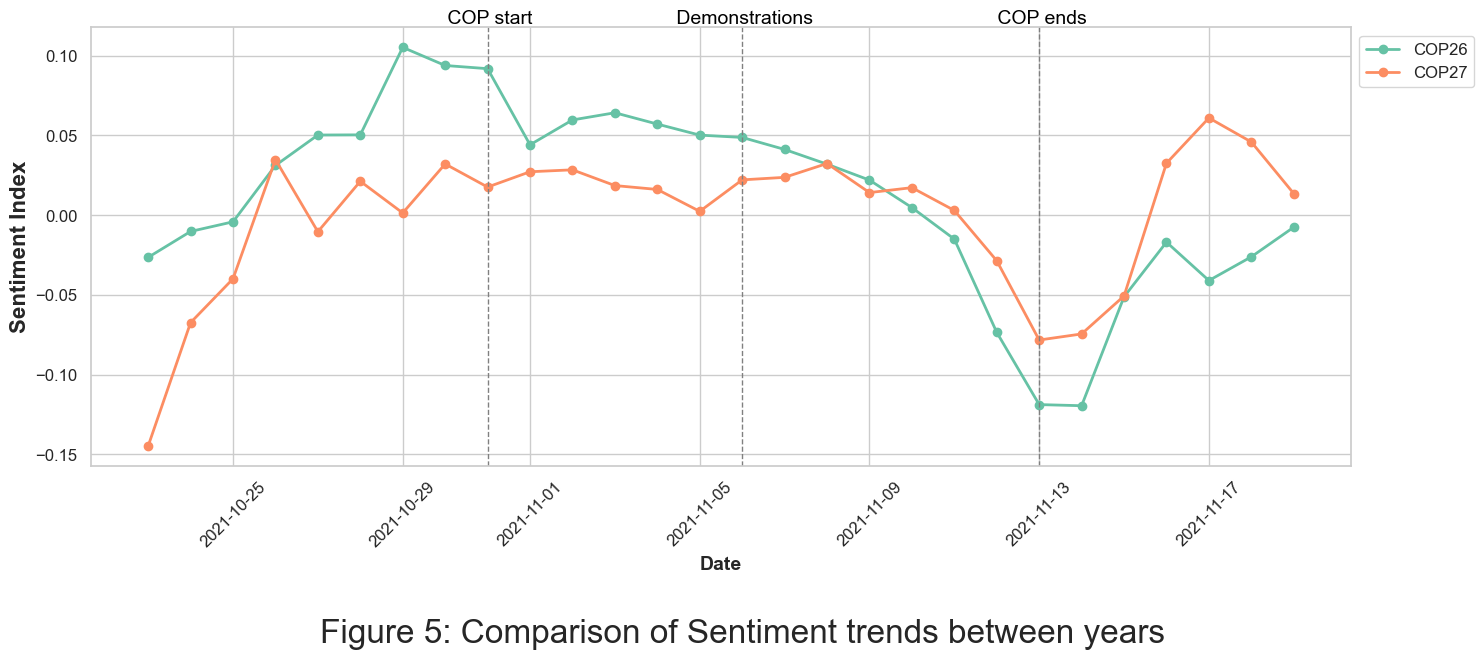

In [39]:
plot_sentiment_comparison3(data_sets, sentiment_type="Sentiment Index",
                           title='Figure 5: Comparison of Sentiment trends between years',
                           date_column="date",
                           legend_names=['COP26', 'COP27'],
                           events=events,
                           moving_avg_window=3)

In [40]:
# Calculate the average number of negative sentiment tweets
average_negative_tweets = COP27_grouped_df['Negative'].mean()

print(average_negative_tweets)

1.4090494989371394


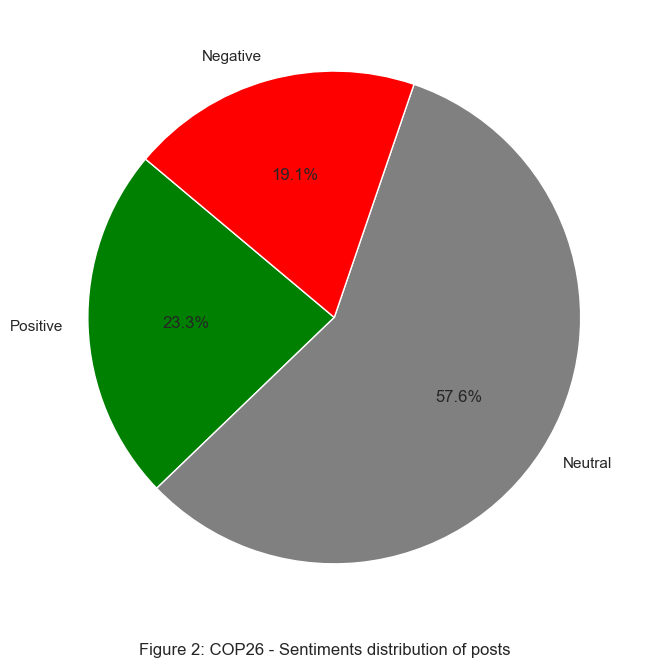

In [41]:
# Aggregate totals for each sentiment category
sentiment_totals = COP26_grouped_df[['Positive', 'Neutral', 'Negative']].sum()

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 8))
sentiment_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'], labels=['Positive', 'Neutral', 'Negative'], ax=ax)
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts

# Manually adding a title below the plot
fig.text(0.5, 0.08 , 'Figure 2: COP26 - Sentiments distribution of posts', ha='center', va='center', fontsize=12)

# Show the plot
plt.show()


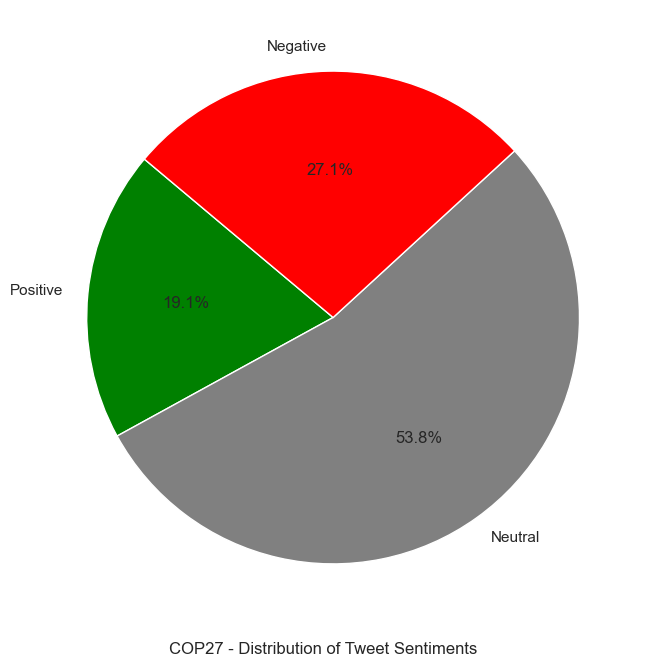

In [42]:
# Aggregate totals for each sentiment category
sentiment_totals = COP27_grouped_df[['Positive', 'Neutral', 'Negative']].sum()

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 8))
sentiment_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'], labels=['Positive', 'Neutral', 'Negative'], ax=ax)
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts

# Manually adding a title below the plot
fig.text(0.5, 0.08 , 'COP27 - Distribution of Tweet Sentiments', ha='center', va='center', fontsize=12)

# Show the plot
plt.show()

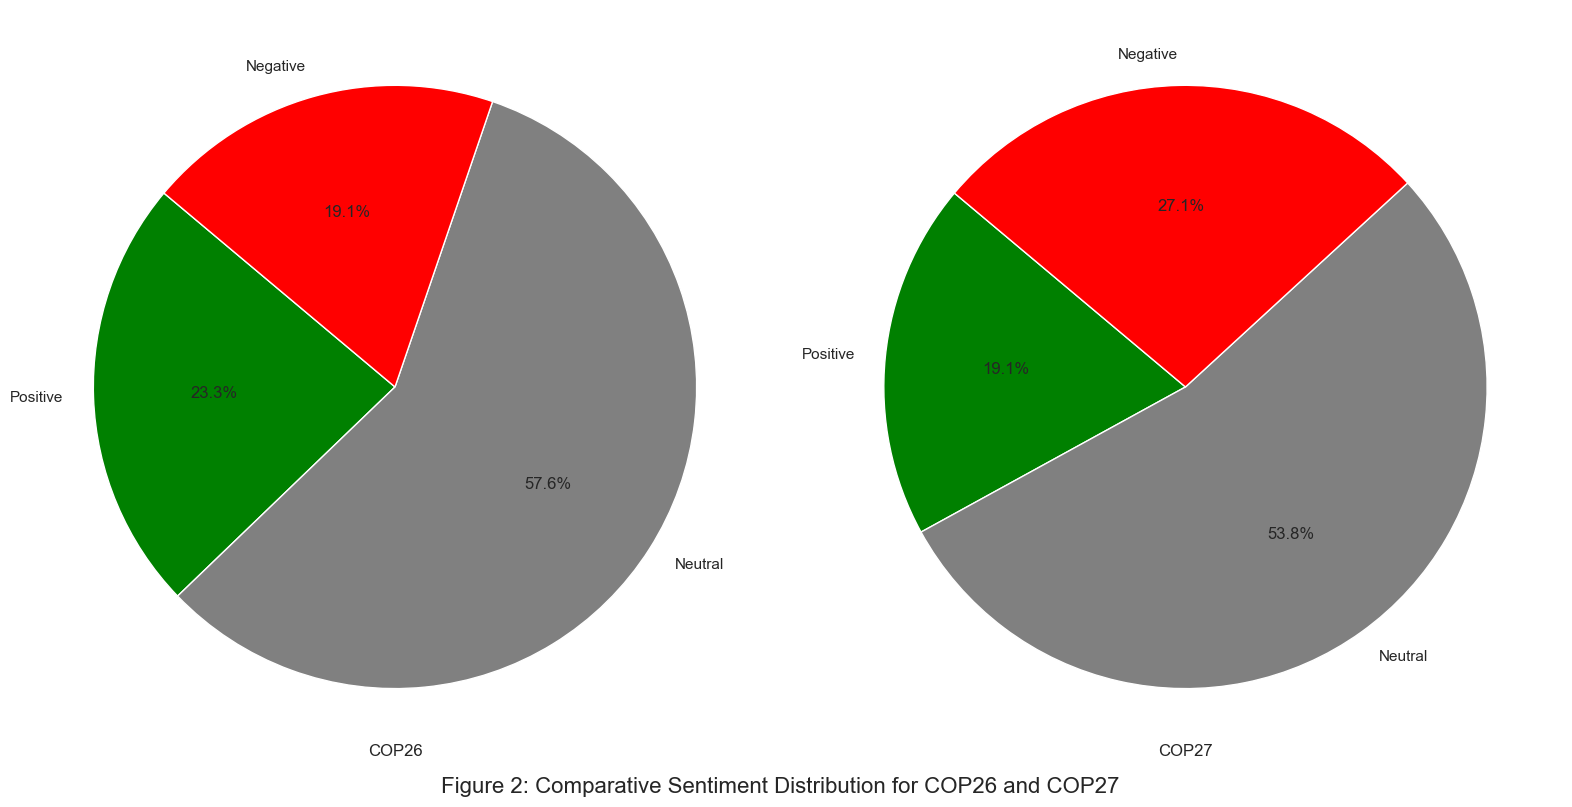

In [43]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (axes) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Aggregate totals for each sentiment category for COP26
sentiment_totals_cop26 = COP26_grouped_df[['Positive', 'Neutral', 'Negative']].sum()
# Plot pie chart for COP26
sentiment_totals_cop26.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'], labels=['Positive', 'Neutral', 'Negative'], ax=ax1)
ax1.set_ylabel('')  # Hide the y-label as it's not needed for pie charts
ax1.set_title('COP26', y=0)  # Adjust title position, raise if necessary

# Aggregate totals for each sentiment category for COP27
sentiment_totals_cop27 = COP27_grouped_df[['Positive', 'Neutral', 'Negative']].sum()
# Plot pie chart for COP27
sentiment_totals_cop27.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'], labels=['Positive', 'Neutral', 'Negative'], ax=ax2)
ax2.set_ylabel('')  # Hide the y-label as it's not needed for pie charts
ax2.set_title('COP27', y=0)  # Adjust title position, raise if necessary

# Manually adding a general title below the plot
fig.text(0.5, 0.00001, 'Figure 2: Comparative Sentiment Distribution for COP26 and COP27', ha='center', va='center', fontsize=16)

# Adjust the layout to make sure everything fits without overlap
fig.tight_layout()

# Show the plot
plt.show()


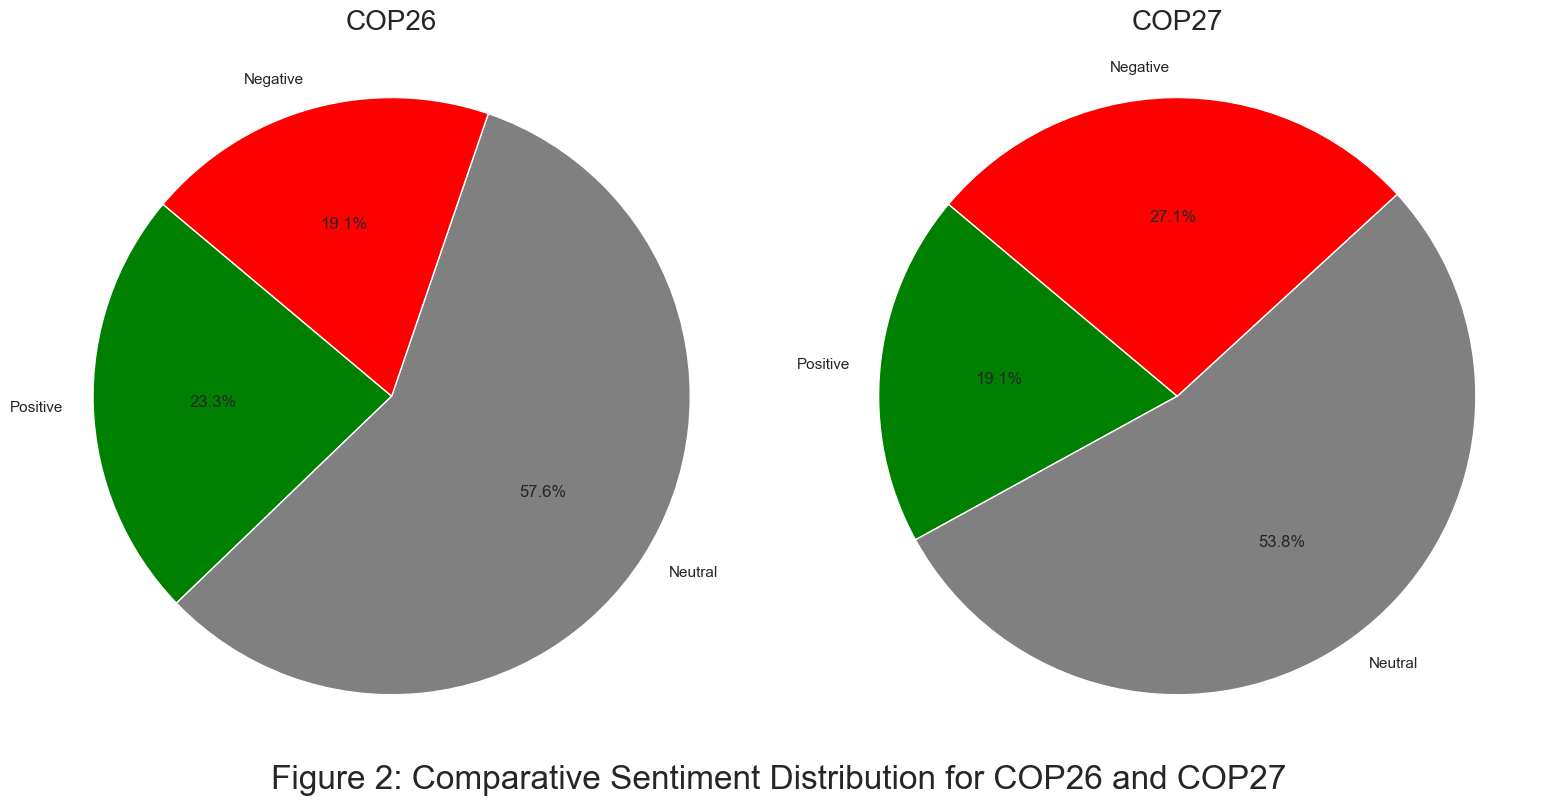

In [44]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (axes) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Aggregate totals for each sentiment category for COP26
sentiment_totals_cop26 = COP26_grouped_df[['Positive', 'Neutral', 'Negative']].sum()
# Plot pie chart for COP26
sentiment_totals_cop26.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'], labels=['Positive', 'Neutral', 'Negative'], ax=ax1)
ax1.set_ylabel('')  # Hide the y-label as it's not needed for pie charts
ax1.set_title('COP26', y=0.98, fontsize=20)  # Adjust title position and font size

# Aggregate totals for each sentiment category for COP27
sentiment_totals_cop27 = COP27_grouped_df[['Positive', 'Neutral', 'Negative']].sum()
# Plot pie chart for COP27
sentiment_totals_cop27.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'], labels=['Positive', 'Neutral', 'Negative'], ax=ax2)
ax2.set_ylabel('')  # Hide the y-label as it's not needed for pie charts
ax2.set_title('COP27', y=0.98, fontsize=20)  # Adjust title position and font size

# Adjust margins and manually add a general title below the plot
fig.subplots_adjust(bottom=0.2)  # Increase bottom margin to give space for the title
fig.text(0.5, 0.01, 'Figure 2: Comparative Sentiment Distribution for COP26 and COP27', ha='center', va='center', fontsize=24)

# Adjust the layout to make sure everything fits without overlap
fig.tight_layout()

# Show the plot
plt.show()


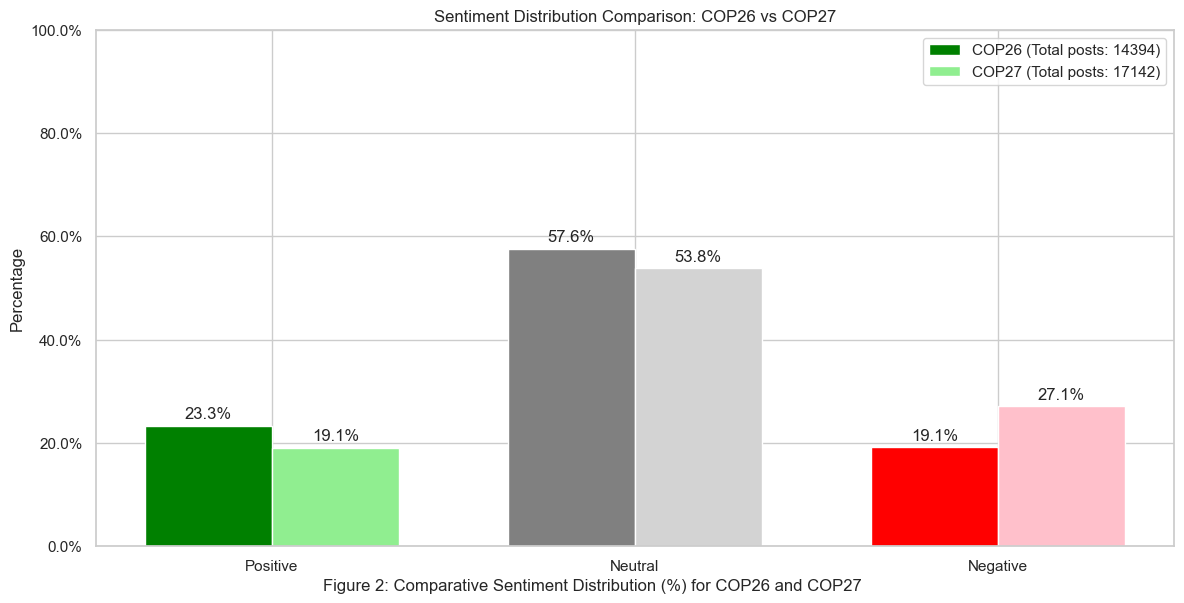

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate totals for each sentiment category
sentiment_totals_cop26 = COP26_grouped_df[['Positive', 'Neutral', 'Negative']].sum()
sentiment_totals_cop27 = COP27_grouped_df[['Positive', 'Neutral', 'Negative']].sum()

# Convert to percentages
sentiment_percentages_cop26 = sentiment_totals_cop26 / sentiment_totals_cop26.sum() * 100
sentiment_percentages_cop27 = sentiment_totals_cop27 / sentiment_totals_cop27.sum() * 100

# Create labels and positions for the bars
labels = ['Positive', 'Neutral', 'Negative']
x = np.arange(len(labels))
width = 0.35  # Width of the bars

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bars
rects1 = ax.bar(x - width/2, sentiment_percentages_cop26, width, label='COP26', color=['green', 'gray', 'red'])
rects2 = ax.bar(x + width/2, sentiment_percentages_cop27, width, label='COP27', color=['lightgreen', 'lightgray', 'pink'])

# Customize the plot
ax.set_ylabel('Percentage')
ax.set_title('Sentiment Distribution Comparison: COP26 vs COP27')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Set y-axis to display percentages from 0 to 100
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

# Add percentage labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Add total post counts to the legend
total_cop26 = sentiment_totals_cop26.sum()
total_cop27 = sentiment_totals_cop27.sum()

legend_labels = [
    f'COP26 (Total posts: {total_cop26:.0f})',
    f'COP27 (Total posts: {total_cop27:.0f})'
]

ax.legend(legend_labels, loc='upper right')

# Add a general title below the plot
fig.text(0.5, 0.01, 'Figure 2: Comparative Sentiment Distribution (%) for COP26 and COP27', ha='center', va='center', fontsize=12)

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

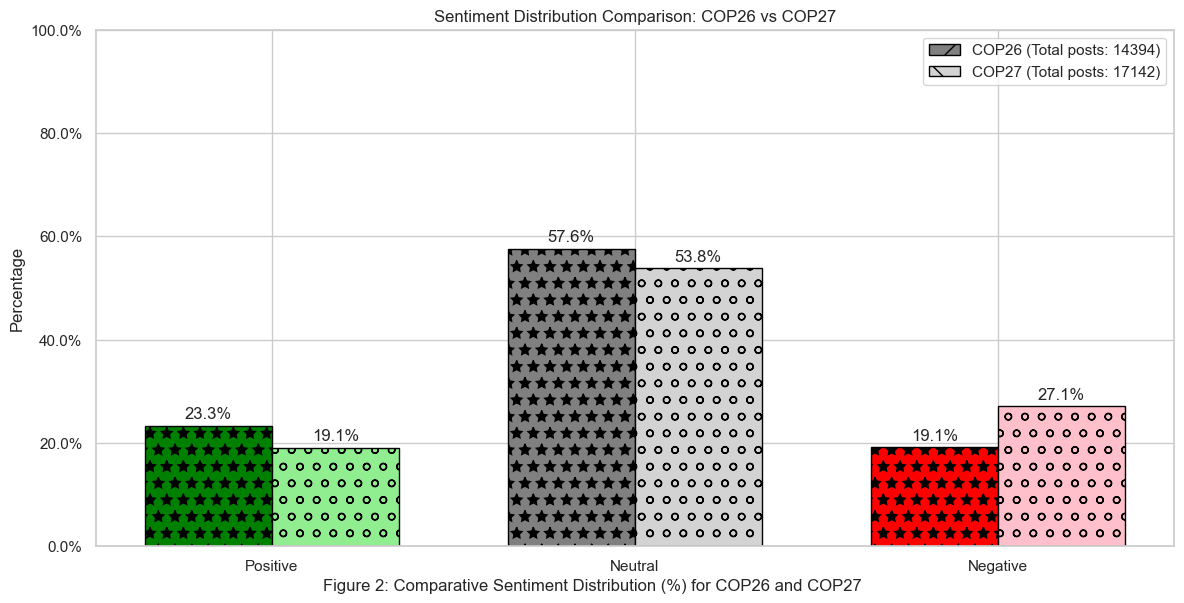

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate totals for each sentiment category
sentiment_totals_cop26 = COP26_grouped_df[['Positive', 'Neutral', 'Negative']].sum()
sentiment_totals_cop27 = COP27_grouped_df[['Positive', 'Neutral', 'Negative']].sum()

# Convert to percentages
sentiment_percentages_cop26 = sentiment_totals_cop26 / sentiment_totals_cop26.sum() * 100
sentiment_percentages_cop27 = sentiment_totals_cop27 / sentiment_totals_cop27.sum() * 100

# Create labels and positions for the bars
labels = ['Positive', 'Neutral', 'Negative']
x = np.arange(len(labels))
width = 0.35  # Width of the bars

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bars
rects1 = ax.bar(x - width/2, sentiment_percentages_cop26, width, label='COP26', color=['green', 'gray', 'red'], edgecolor='black', linewidth=1, hatch='*')
rects2 = ax.bar(x + width/2, sentiment_percentages_cop27, width, label='COP27', color=['lightgreen', 'lightgray', 'pink'], edgecolor='black', linewidth=1, hatch='o')

# Customize the plot
ax.set_ylabel('Percentage')
ax.set_title('Sentiment Distribution Comparison: COP26 vs COP27')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Set y-axis to display percentages from 0 to 100
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

# Add percentage labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Add total post counts to the legend
total_cop26 = sentiment_totals_cop26.sum()
total_cop27 = sentiment_totals_cop27.sum()

legend_labels = [
    f'COP26 (Total posts: {total_cop26:.0f})',
    f'COP27 (Total posts: {total_cop27:.0f})'
]

# Create custom legend handles
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='gray', edgecolor='black', hatch='/', label=f'COP26 (Total posts: {total_cop26:.0f})'),
    plt.Rectangle((0,0),1,1, facecolor='lightgray', edgecolor='black', hatch='\\', label=f'COP27 (Total posts: {total_cop27:.0f})')
]

ax.legend(handles=legend_elements, loc='upper right')

# Add a general title below the plot
fig.text(0.5, 0.01, 'Figure 2: Comparative Sentiment Distribution (%) for COP26 and COP27', ha='center', va='center', fontsize=12)

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

In [47]:
# Create DataFrame
sentiment_percentages = pd.DataFrame({
    'COP26': sentiment_percentages_cop26,
    'COP27': sentiment_percentages_cop27
})


In [48]:
'''
# For COP26
sentiment_counts_COP26 = COP26_grouped_df[['Positive', 'Neutral', 'Negative']].sum()

# For COP27
sentiment_counts_COP27 = COP27_grouped_df[['Positive', 'Neutral', 'Negative']].sum()
'''

"\n# For COP26\nsentiment_counts_COP26 = COP26_grouped_df[['Positive', 'Neutral', 'Negative']].sum()\n\n# For COP27\nsentiment_counts_COP27 = COP27_grouped_df[['Positive', 'Neutral', 'Negative']].sum()\n"

In [49]:
'''
# Calculate total tweets for each conference
total_cop26 = sentiment_counts_COP26.sum()
total_cop27 = sentiment_counts_COP27.sum()

# Calculate percentages for COP26
sentiment_percentages_cop26 = (sentiment_counts_COP26 / total_cop26) * 100

# Calculate percentages for COP27
sentiment_percentages_cop27 = (sentiment_counts_COP27 / total_cop27) * 100
'''

'\n# Calculate total tweets for each conference\ntotal_cop26 = sentiment_counts_COP26.sum()\ntotal_cop27 = sentiment_counts_COP27.sum()\n\n# Calculate percentages for COP26\nsentiment_percentages_cop26 = (sentiment_counts_COP26 / total_cop26) * 100\n\n# Calculate percentages for COP27\nsentiment_percentages_cop27 = (sentiment_counts_COP27 / total_cop27) * 100\n'

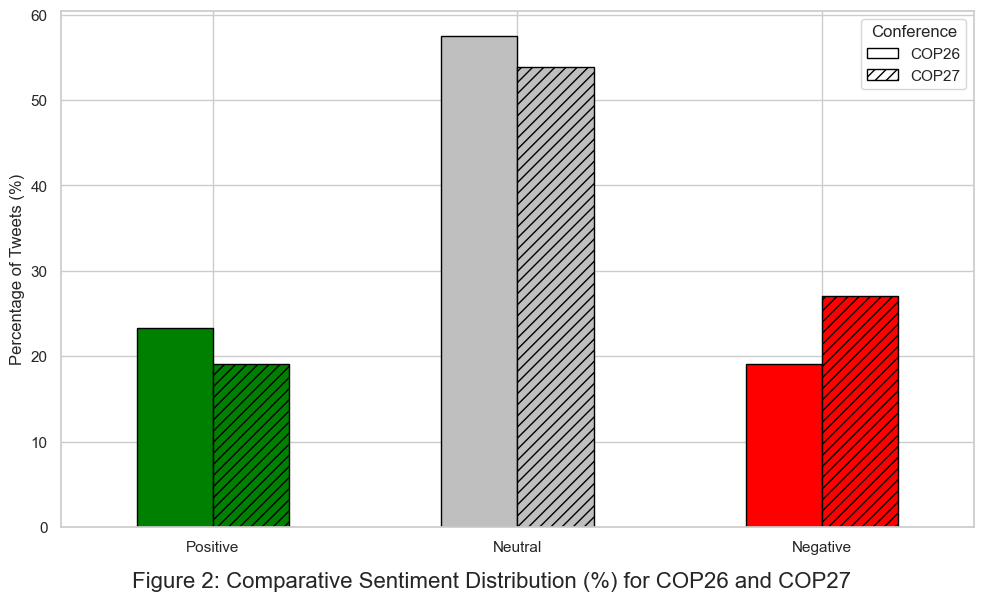

In [50]:
import matplotlib.pyplot as plt

import pandas as pd
from matplotlib.patches import Patch

# Assuming sentiment_percentages is already created

# Define the colors based on sentiment
sentiment_colors = {
    'Positive': 'green',
    'Neutral': '#bfbfbf',  # Lighter gray for better visibility
    'Negative': 'red'
}

# Define hatch patterns for COP26 and COP27
hatch_patterns = {
    'COP26': '',        # No hatch for COP26
    'COP27': '///'      # Diagonal hatching for COP27
}

# Plot the grouped bar chart
ax = sentiment_percentages.plot(kind='bar', figsize=(10, 6), color=['white', 'white'], edgecolor='black')

# Get the sentiment categories and conferences
sentiments = sentiment_percentages.index.tolist()     # ['Positive', 'Neutral', 'Negative']
conferences = sentiment_percentages.columns.tolist()  # ['COP26', 'COP27']

# Customize bars
for i, bar_container in enumerate(ax.containers):
    conference = conferences[i]
    hatch = hatch_patterns[conference]
    for j, bar in enumerate(bar_container):
        sentiment = sentiments[j]
        color = sentiment_colors[sentiment]
        bar.set_facecolor(color)
        bar.set_hatch(hatch)
        bar.set_edgecolor('black')  # Ensures the hatch patterns are visible

# Remove x-axis label
ax.set_xlabel('')

# Set y-axis label
ax.set_ylabel('Percentage of Tweets (%)', fontsize=12)

# Set the x-tick labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Get the figure object
fig = ax.get_figure()

# Adjust the bottom margin to make room for the title
fig.subplots_adjust(bottom=0.8)  # Increase bottom margin to 20% of the figure height

# Add title at the bottom
fig.text(0.5, 0.01, 'Figure 2: Comparative Sentiment Distribution (%) for COP26 and COP27', ha='center', fontsize=16)

# Create custom legend handles for COP26 and COP27 only
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch='', label='COP26'),
    Patch(facecolor='white', edgecolor='black', hatch='///', label='COP27')
]

# Add the legend to the plot
ax.legend(handles=legend_elements, title='Conference')

# Optional: Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust the rect parameter to prevent tight_layout from overlapping with subplots_adjust

# Show the plot
plt.show()


In [51]:
# Calculate average and standard deviation for tweet counts
average_tweets_COP26 = df_COP26_relevance.groupby('Name')['label'].count().mean()
std_dev_tweets_COP26 = df_COP26_relevance.groupby('Name')['label'].count().std()

# Identify active NGOs
threshold = average_tweets_COP26 + std_dev_tweets_COP26
active_ngos_COP26 = df_COP26_relevance.groupby('Name').filter(lambda x: len(x) > threshold)

# Aggregate counts of each label for selected NGOs
active_ngos_summary_COP26 = active_ngos_COP26.groupby(['Name', 'label'])['label'].count().unstack(fill_value=0).reset_index()
active_ngos_summary_COP26['Total'] = active_ngos_summary_COP26['positive'] + active_ngos_summary_COP26['negative']

# Sort NGOs by total number of tweets
sorted_active_ngos_summary_COP26 = active_ngos_summary_COP26.sort_values(by='Total', ascending=False)

# The 'sorted_active_ngos_summary' dataframe is now ready for plotting the stacked bar graph

In [52]:
print(average_tweets_COP26)
print(std_dev_tweets_COP26)

55.575289575289574
77.53462047062813


In [53]:
# Ensure the data is sorted by the total number of tweets if not already sorted
active_ngos_summary_sorted_COP26 = active_ngos_summary_COP26.sort_values(by='Total', ascending=False)
active_ngos_summary_sorted_COP26['difference'] = active_ngos_summary_sorted_COP26['negative'] - active_ngos_summary_sorted_COP26['positive']
group_info_COP26 = df_COP26_relevance[['Name', 'Group']].drop_duplicates()
# Merge the 'Group' information into the 'active_ngos_summary_sorted' dataframe
active_ngos_summary_sorted_COP26 = pd.merge(active_ngos_summary_sorted_COP26, group_info_COP26, on='Name', how='left')

In [54]:
active_ngos_summary_sorted_COP26['Group'].value_counts()

Group
2    11
1     7
4     6
3     4
Name: count, dtype: int64

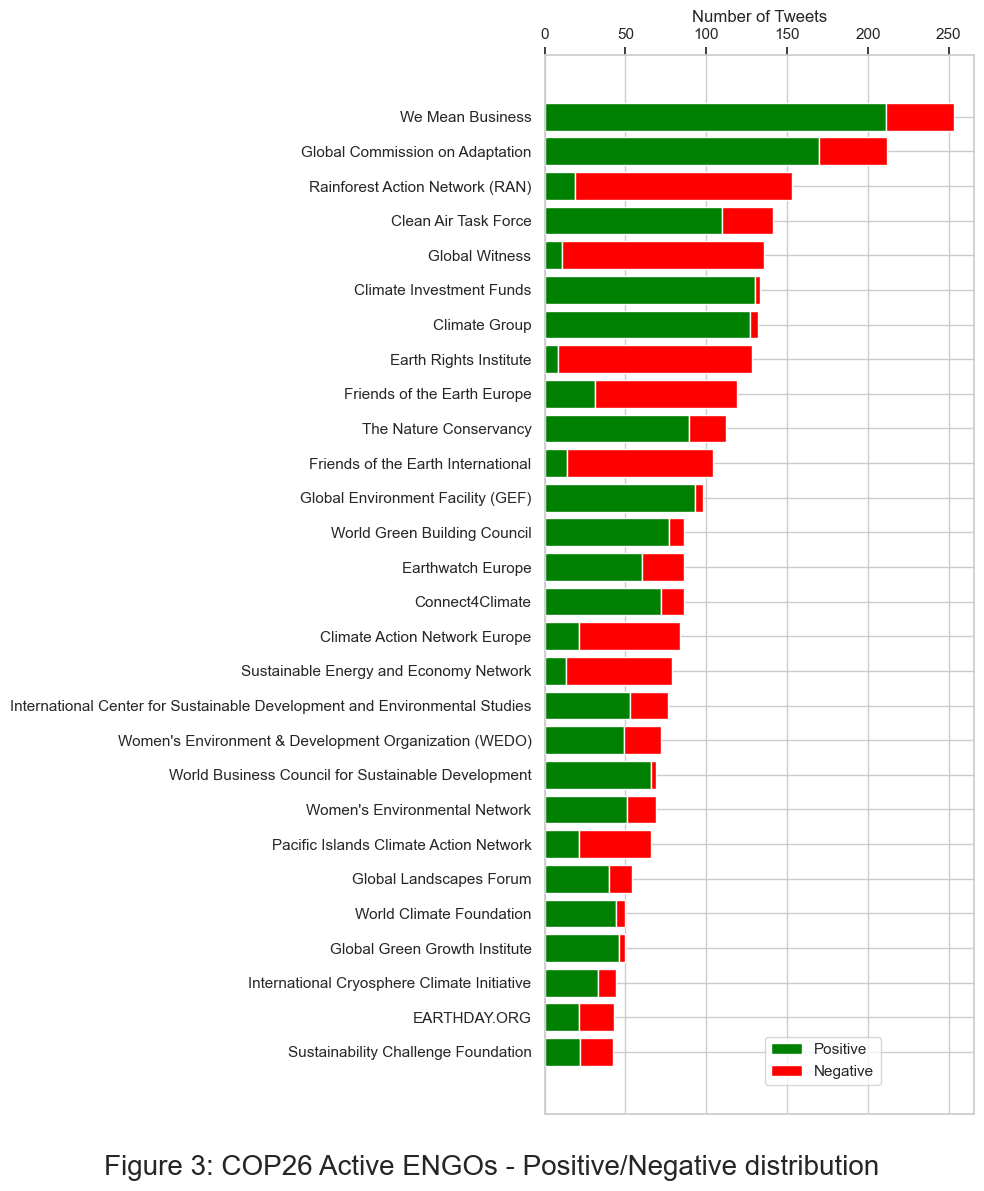

In [55]:
import matplotlib.pyplot as plt

def plot_horizontal_stacked_bar(data, title):
    fig, ax = plt.subplots(figsize=(10, 12))

    data = data.iloc[::-1]

    ax.barh(data['Name'],
            data['positive'],
            label='Positive',
            color='green')

    ax.barh(data['Name'],
            data['negative'],
            left=data['positive'],
            label='Negative',
            color='red')

    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

    ax.set_xlabel('Number of Tweets')
    ax.set_ylabel('')

    # Adjust legend position: bbox_to_anchor=(x, y)
    # x: 0 is left edge, 1 is right edge
    # y: 0 is bottom, 1 is top
    ax.legend(loc='center right', bbox_to_anchor=(0.8, 0.05))

    fig.text(0.5, 0.02, title, ha='center', va='center', fontsize=20)

    plt.subplots_adjust(left=0.4, top=0.95)
    plt.tight_layout(rect=[0, 0.05, 1, 1])

    return fig, ax

fig, ax = plot_horizontal_stacked_bar(
    active_ngos_summary_sorted_COP26,
    'Figure 3: COP26 Active ENGOs - Positive/Negative distribution'
)
plt.show()

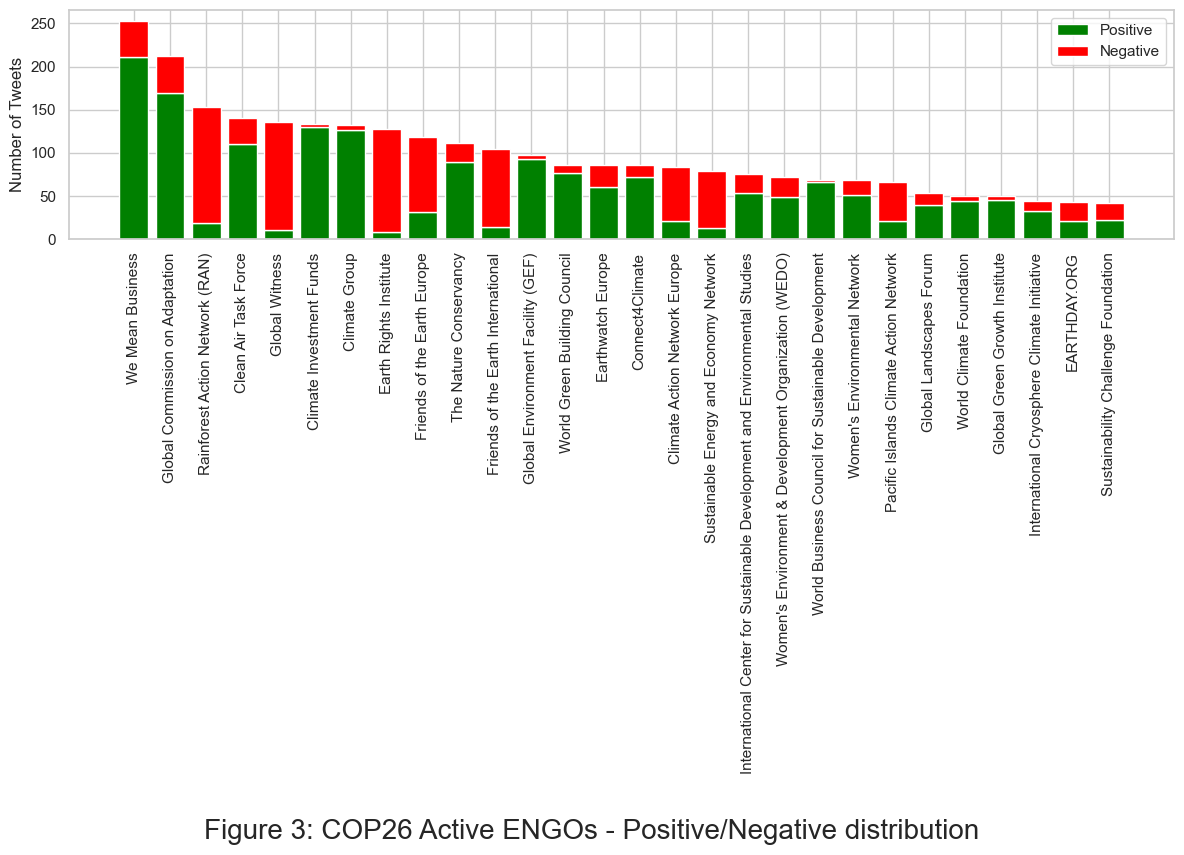

In [56]:
# Create the stacked bar graph
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size as necessary

# Plot positive tweets
ax.bar(active_ngos_summary_sorted_COP26['Name'], active_ngos_summary_sorted_COP26['positive'], label='Positive', color='green')

# Plot negative tweets on top of positive tweets
ax.bar(active_ngos_summary_sorted_COP26['Name'], active_ngos_summary_sorted_COP26['negative'], bottom=active_ngos_summary_sorted_COP26['positive'], label='Negative', color='red')

# Add labels
ax.set_ylabel('Number of Tweets')
ax.set_xticks(range(len(active_ngos_summary_sorted_COP26['Name'])))  # Ensure ticks are set correctly for names
ax.set_xticklabels(active_ngos_summary_sorted_COP26['Name'], rotation=90)  # Rotate the x-axis labels for better readability
ax.legend()

# Manually adding a title below the plot
fig.text(0.5, -0.05, 'Figure 3: COP26 Active ENGOs - Positive/Negative distribution', ha='center', va='center', fontsize=20)

# Adjust layout to make room for the rotated x-axis labels and the title at the bottom
fig.subplots_adjust(bottom=0.2)  # Increase the bottom margin to allow space for the title below the axes
plt.tight_layout()
plt.show()



In [57]:
active_ngos_summary_sorted_COP26

,Name,negative,neutral,positive,Total,difference,Group
0,We Mean Business,42,427,211,253,-169,3
1,Global Commission on Adaptation,42,374,170,212,-128,1
2,Rainforest Action Network (RAN),134,50,19,153,115,2
3,Clean Air Task Force,31,198,110,141,-79,2
4,Global Witness,125,38,11,136,114,2
5,Climate Investment Funds,3,93,130,133,-127,3
6,Climate Group,5,123,127,132,-122,2
7,Earth Rights Institute,120,68,8,128,112,4
8,Friends of the Earth Europe,88,63,31,119,57,1
9,The Nature Conservancy,23,138,89,112,-66,1


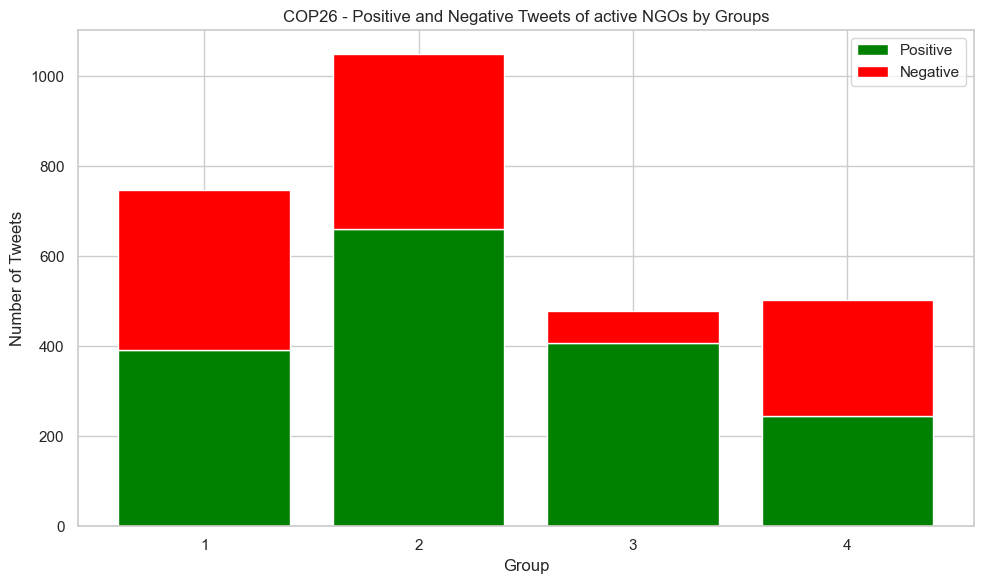

In [58]:
# Aggregate positive and negative tweet counts by the "Group" column
grouped_sentiment_summary_COP26 = active_ngos_summary_sorted_COP26.groupby('Group')[['positive', 'negative']].sum()

# Plot the stacked bar graph for each group
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot positive tweets
plt.bar(grouped_sentiment_summary_COP26.index, grouped_sentiment_summary_COP26['positive'], label='Positive', color='green')

# Plot negative tweets on top of positive tweets
plt.bar(grouped_sentiment_summary_COP26.index, grouped_sentiment_summary_COP26['negative'], bottom=grouped_sentiment_summary_COP26['positive'], label='Negative', color='red')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Number of Tweets')
plt.title('COP26 - Positive and Negative Tweets of active NGOs by Groups')
plt.xticks(grouped_sentiment_summary_COP26.index)  # Set the x-ticks to the group numbers
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

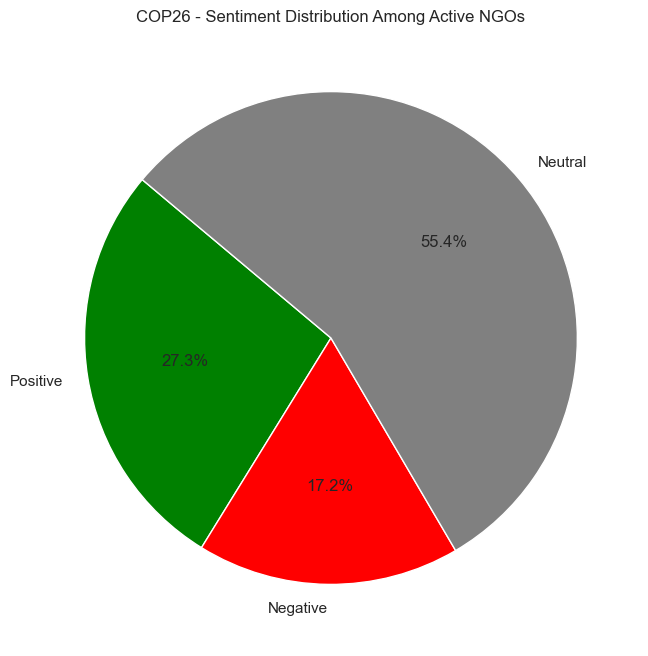

In [59]:
# Aggregate counts of each sentiment category across all NGOs in the dataframe
sentiment_counts_COP26 = active_ngos_summary_COP26[['positive', 'negative', 'neutral']].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
sentiment_counts_COP26.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=['Positive', 'Negative', 'Neutral'], colors=['green', 'red', 'gray'])
plt.title('COP26 - Sentiment Distribution Among Active NGOs')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts

# Show the plot
plt.show()

In [60]:
# Calculate average and standard deviation for tweet counts
average_tweets_COP27= df_COP27_relevance.groupby('Name')['label'].count().mean()
std_dev_tweets_COP27 = df_COP27_relevance.groupby('Name')['label'].count().std()

# Identify active NGOs
threshold_COP27 = average_tweets_COP27 + std_dev_tweets_COP27
active_ngos_COP27 = df_COP27_relevance.groupby('Name').filter(lambda x: len(x) > threshold)

# Aggregate counts of each label for selected NGOs
active_ngos_summary_COP27 = active_ngos_COP27.groupby(['Name', 'label'])['label'].count().unstack(fill_value=0).reset_index()
active_ngos_summary_COP27['Total'] = active_ngos_summary_COP27['positive'] + active_ngos_summary_COP27['negative']

# Sort NGOs by total number of tweets
sorted_active_ngos_summary_COP27 = active_ngos_summary_COP27.sort_values(by='Total', ascending=False)

# The 'sorted_active_ngos_summary' dataframe is now ready for plotting the stacked bar graph

In [61]:
print(average_tweets_COP27)
print(std_dev_tweets_COP27)

68.02380952380952
122.39987138274854


In [62]:
std_dev_tweets_COP27

122.39987138274854

In [63]:
# Ensure the data is sorted by the total number of tweets if not already sorted
active_ngos_summary_sorted_COP27 = active_ngos_summary_COP27.sort_values(by='Total', ascending=False)
active_ngos_summary_sorted_COP27['difference'] = active_ngos_summary_sorted_COP27['negative'] - active_ngos_summary_sorted_COP27['positive']
group_info_COP27 = df_COP27_relevance[['Name', 'Group']].drop_duplicates()
# Merge the 'Group' information into the 'active_ngos_summary_sorted' dataframe
active_ngos_summary_sorted_COP27 = pd.merge(active_ngos_summary_sorted_COP27, group_info_COP27, on='Name', how='left')

In [64]:
len(active_ngos_summary_sorted_COP27)

37

In [65]:
active_ngos_summary_sorted_COP27['Group'].value_counts()

Group
2    19
1    11
3     5
4     2
Name: count, dtype: int64

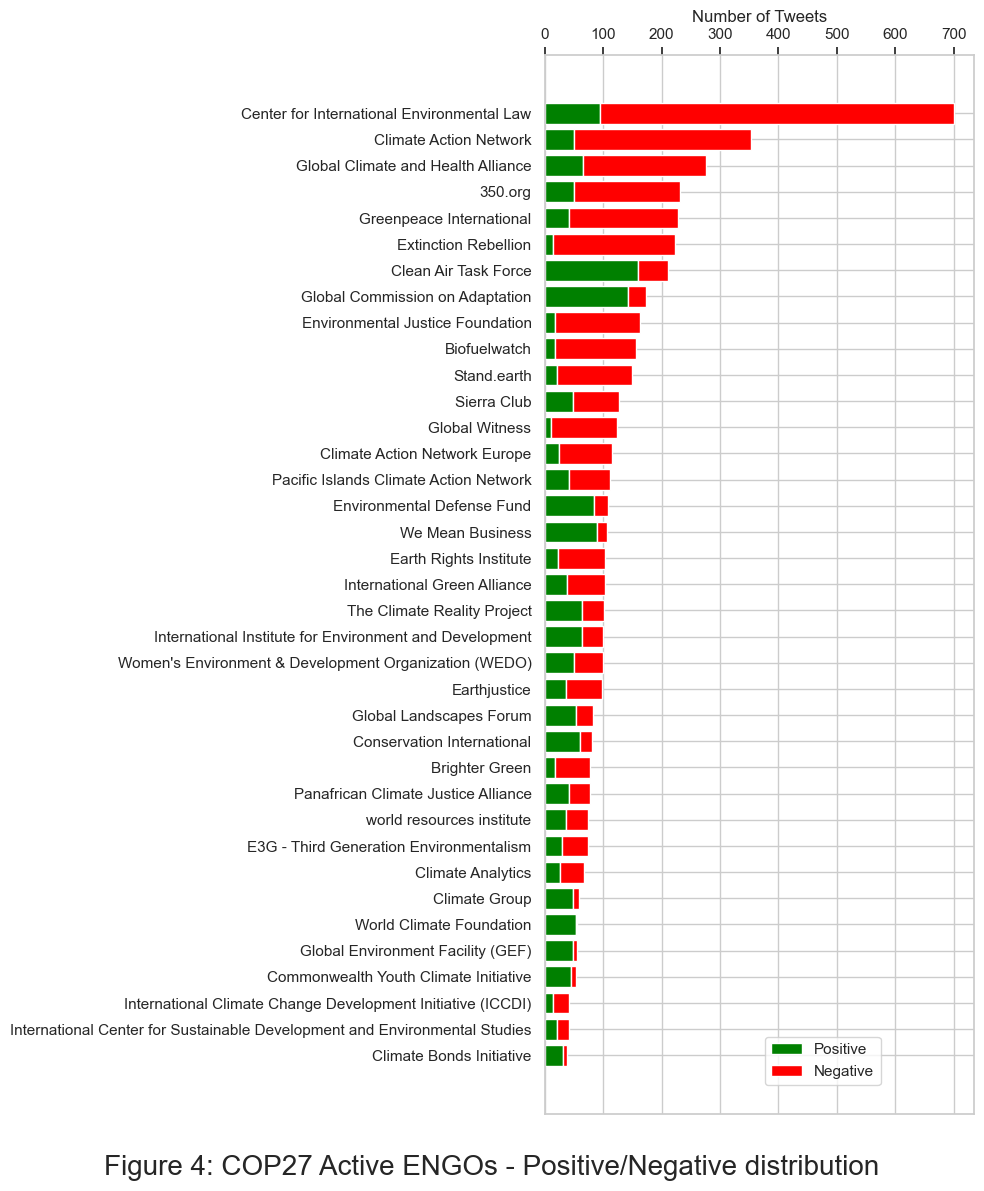

In [66]:
import matplotlib.pyplot as plt

def plot_horizontal_stacked_bar(data, title):
    fig, ax = plt.subplots(figsize=(10, 12))

    data = data.iloc[::-1]

    ax.barh(data['Name'],
            data['positive'],
            label='Positive',
            color='green')

    ax.barh(data['Name'],
            data['negative'],
            left=data['positive'],
            label='Negative',
            color='red')

    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

    ax.set_xlabel('Number of Tweets')
    ax.set_ylabel('')

    ax.legend(loc='center right', bbox_to_anchor=(0.8, 0.05))

    fig.text(0.5, 0.02, title, ha='center', va='center', fontsize=20)

    plt.subplots_adjust(left=0.4, top=0.95)
    plt.tight_layout(rect=[0, 0.05, 1, 1])

    return fig, ax

fig, ax = plot_horizontal_stacked_bar(
    active_ngos_summary_sorted_COP27,
    'Figure 4: COP27 Active ENGOs - Positive/Negative distribution'
)
plt.show()

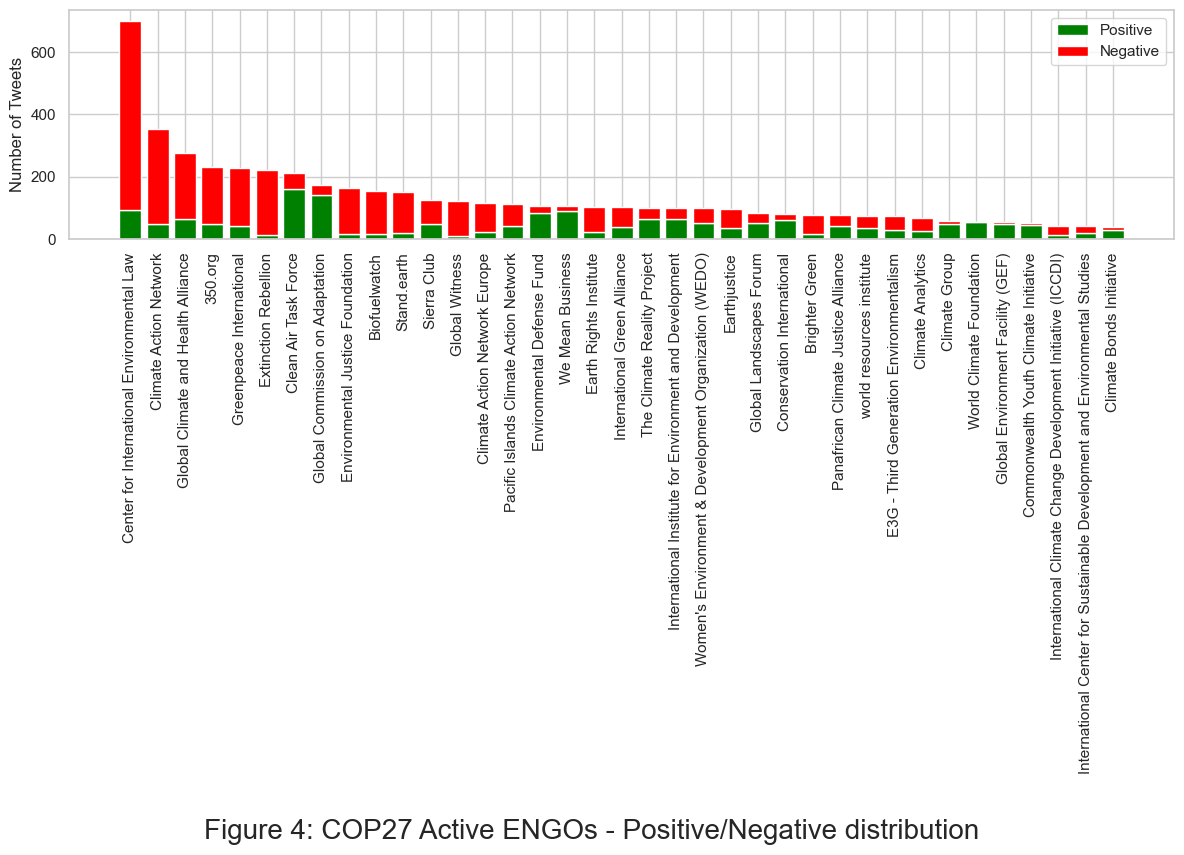

In [67]:
# Create the stacked bar graph
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size as necessary

# Plot positive tweets
ax.bar(active_ngos_summary_sorted_COP27['Name'], active_ngos_summary_sorted_COP27['positive'], label='Positive', color='green')

# Plot negative tweets on top of positive tweets
ax.bar(active_ngos_summary_sorted_COP27['Name'], active_ngos_summary_sorted_COP27['negative'], bottom=active_ngos_summary_sorted_COP27['positive'], label='Negative', color='red')

# Add labels
ax.set_ylabel('Number of Tweets')
ax.set_xticks(range(len(active_ngos_summary_sorted_COP27['Name'])))  # Ensure ticks are set correctly for names
ax.set_xticklabels(active_ngos_summary_sorted_COP27['Name'], rotation=90)  # Rotate the x-axis labels for better readability
ax.legend()

# Manually adding a title below the plot
fig.text(0.5, -0.05, 'Figure 4: COP27 Active ENGOs - Positive/Negative distribution', ha='center', va='center', fontsize=20)

# Adjust layout to make room for the rotated x-axis labels and the title at the bottom
fig.subplots_adjust(bottom=0.2)  # Increase the bottom margin to allow space for the title below the axes
plt.tight_layout()
plt.show()


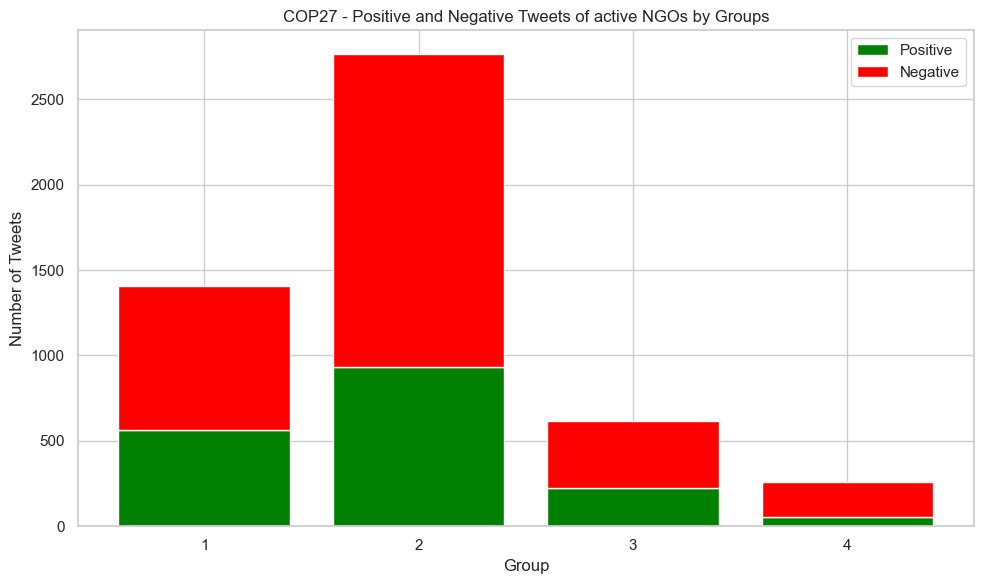

In [68]:
# Aggregate positive and negative tweet counts by the "Group" column
grouped_sentiment_summary_COP27 = active_ngos_summary_sorted_COP27.groupby('Group')[['positive', 'negative']].sum()

# Plot the stacked bar graph for each group
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot positive tweets
plt.bar(grouped_sentiment_summary_COP27.index, grouped_sentiment_summary_COP27['positive'], label='Positive', color='green')

# Plot negative tweets on top of positive tweets
plt.bar(grouped_sentiment_summary_COP27.index, grouped_sentiment_summary_COP27['negative'], bottom=grouped_sentiment_summary_COP27['positive'], label='Negative', color='red')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Number of Tweets')
plt.title('COP27 - Positive and Negative Tweets of active NGOs by Groups')
plt.xticks(grouped_sentiment_summary_COP27.index)  # Set the x-ticks to the group numbers
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [69]:
active_ngos_summary_sorted_COP27

,Name,negative,neutral,positive,Total,difference,Group
0,Center for International Environmental Law,606,610,94,700,512,2
1,Climate Action Network,304,290,50,354,254,1
2,Global Climate and Health Alliance,211,354,66,277,145,2
3,350.org,182,189,50,232,132,1
4,Greenpeace International,187,149,41,228,146,2
5,Extinction Rebellion,209,144,14,223,195,3
6,Clean Air Task Force,51,296,160,211,-109,2
7,Global Commission on Adaptation,32,182,142,174,-110,1
8,Environmental Justice Foundation,145,90,18,163,127,2
9,Biofuelwatch,138,100,18,156,120,4


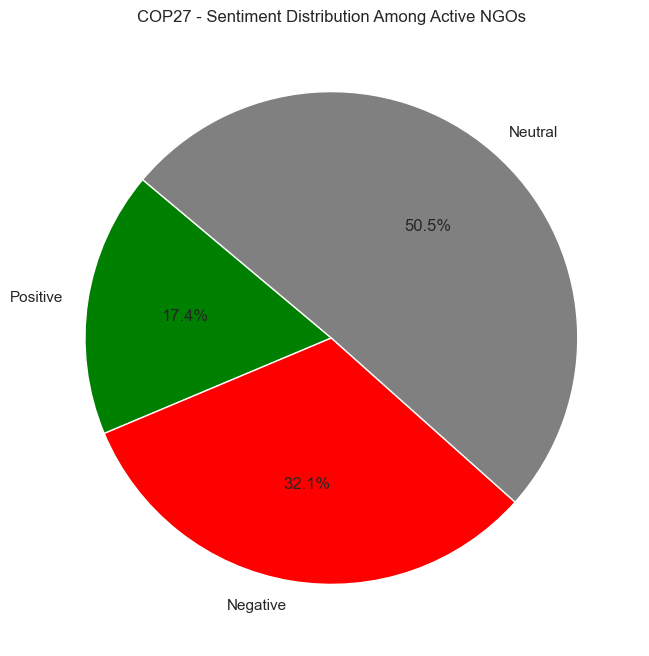

In [70]:
# Aggregate counts of each sentiment category across all NGOs in the dataframe
sentiment_counts_COP27 = active_ngos_summary_COP27[['positive', 'negative', 'neutral']].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
sentiment_counts_COP27.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=['Positive', 'Negative', 'Neutral'], colors=['green', 'red', 'gray'])
plt.title('COP27 - Sentiment Distribution Among Active NGOs')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts

# Show the plot
plt.show()

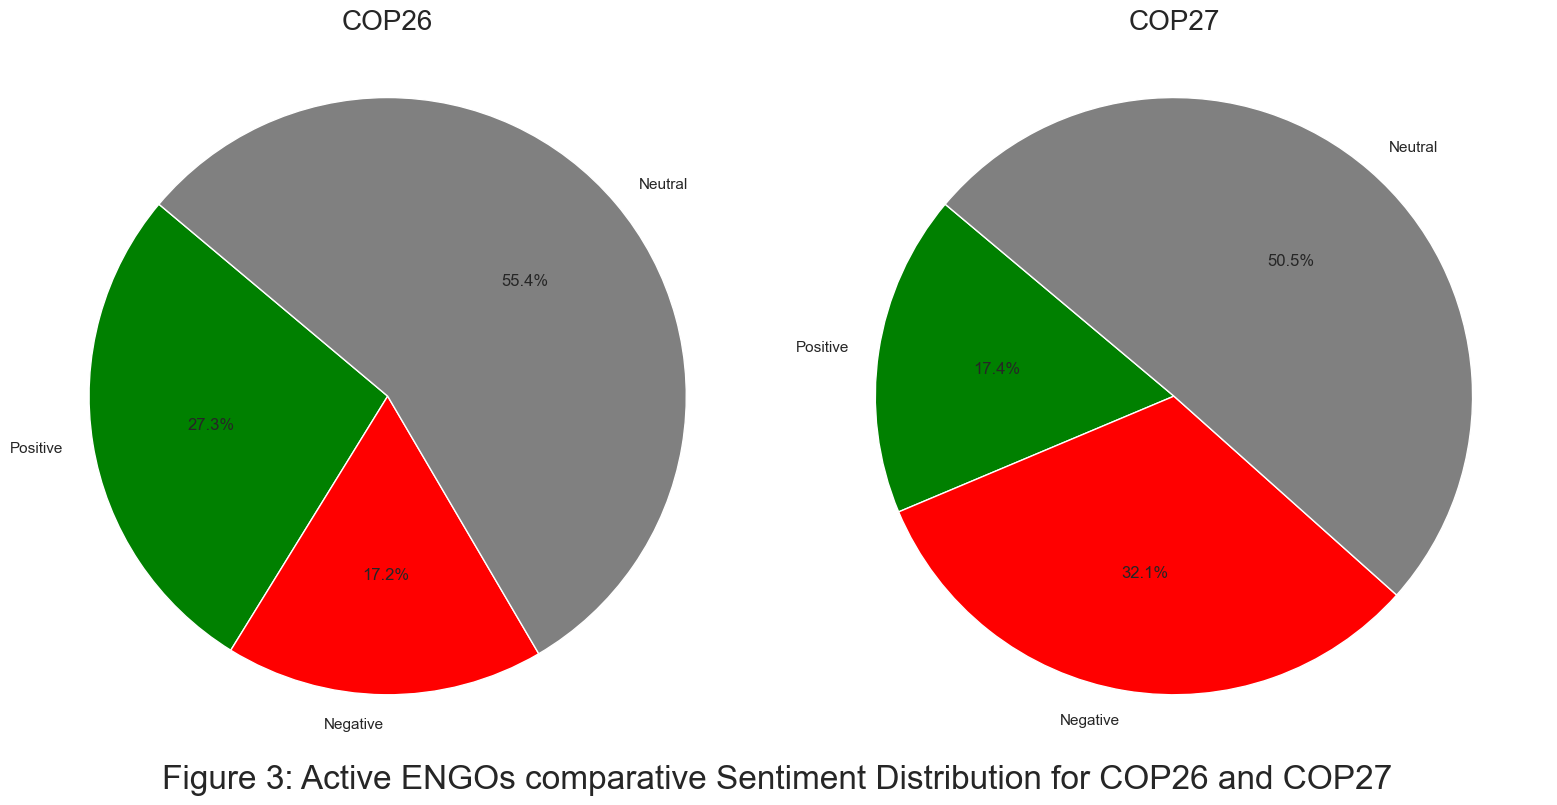

In [71]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (axes) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Aggregate totals for each sentiment category for COP26
sentiment_counts_COP26 = active_ngos_summary_COP26[['positive', 'negative', 'neutral']].sum()
# Plot pie chart for COP26
sentiment_counts_COP26.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'], labels=['Positive', 'Negative', 'Neutral'], ax=ax1)
ax1.set_ylabel('')  # Hide the y-label as it's not needed for pie charts
ax1.set_title('COP26', y=0.98, fontsize=20)  # Adjust title position and font size

# Aggregate totals for each sentiment category for COP27
sentiment_counts_COP27 = active_ngos_summary_COP27[['positive', 'negative', 'neutral']].sum()
# Plot pie chart for COP27
sentiment_counts_COP27.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'], labels=['Positive', 'Negative', 'Neutral'], ax=ax2)
ax2.set_ylabel('')  # Hide the y-label as it's not needed for pie charts
ax2.set_title('COP27', y=0.98, fontsize=20)  # Adjust title position and font size

# Adjust margins and manually add a general title below the plot
fig.subplots_adjust(bottom=0.2)  # Increase bottom margin to give space for the title
fig.text(0.5, 0.01, 'Figure 3: Active ENGOs comparative Sentiment Distribution for COP26 and COP27', ha='center', va='center', fontsize=24)

# Adjust the layout to make sure everything fits without overlap
fig.tight_layout()

# Show the plot
plt.show()

In [72]:
# For COP26
sentiment_counts_COP26 = active_ngos_summary_COP26[['positive', 'negative', 'neutral']].sum()

# For COP27
sentiment_counts_COP27 = active_ngos_summary_COP27[['positive', 'negative', 'neutral']].sum()


In [73]:
# Calculate total tweets for each conference
total_cop26 = sentiment_counts_COP26.sum()
total_cop27 = sentiment_counts_COP27.sum()

# Calculate percentages for COP26
sentiment_percentages_cop26 = (sentiment_counts_COP26 / total_cop26) * 100

# Calculate percentages for COP27
sentiment_percentages_cop27 = (sentiment_counts_COP27 / total_cop27) * 100


In [74]:
import pandas as pd

# Create DataFrame
sentiment_percentages = pd.DataFrame({
    'COP26': sentiment_percentages_cop26,
    'COP27': sentiment_percentages_cop27
})


In [75]:
# Capitalize the sentiment labels if needed
sentiment_percentages.index = sentiment_percentages.index.str.capitalize()


In [76]:
# Reorder the DataFrame
sentiment_percentages = sentiment_percentages.loc[['Positive', 'Neutral', 'Negative']]


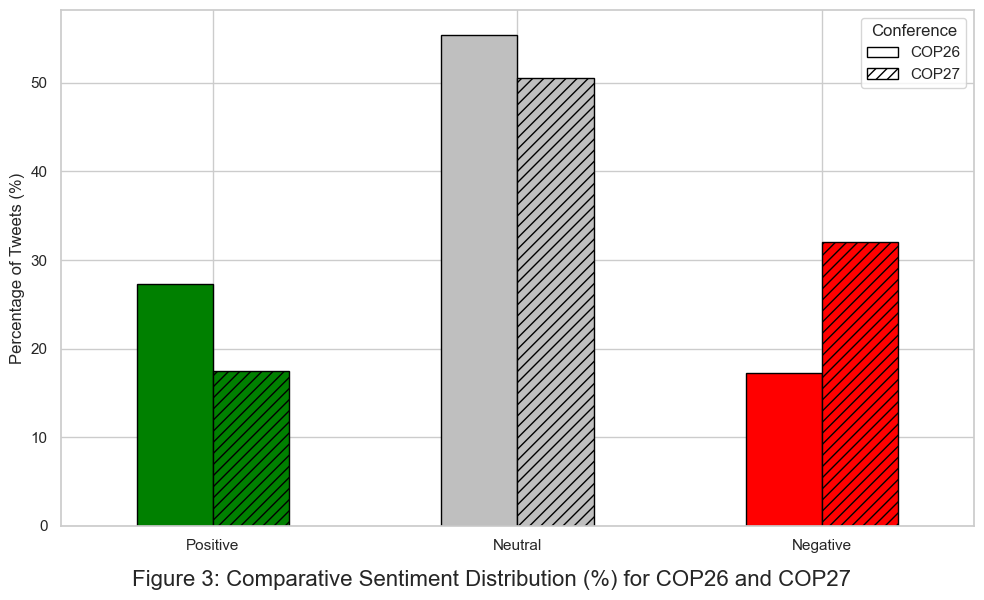

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Assuming sentiment_percentages is already created

# Define the colors based on sentiment
sentiment_colors = {
    'Positive': 'green',
    'Neutral': '#bfbfbf',  # Lighter gray for better visibility
    'Negative': 'red'
}

# Define hatch patterns for COP26 and COP27
hatch_patterns = {
    'COP26': '',        # No hatch for COP26
    'COP27': '///'      # Diagonal hatching for COP27
}

# Plot the grouped bar chart
ax = sentiment_percentages.plot(kind='bar', figsize=(10, 6), color=['white', 'white'], edgecolor='black')

# Get the sentiment categories and conferences
sentiments = sentiment_percentages.index.tolist()     # ['Positive', 'Neutral', 'Negative']
conferences = sentiment_percentages.columns.tolist()  # ['COP26', 'COP27']

# Customize bars
for i, bar_container in enumerate(ax.containers):
    conference = conferences[i]
    hatch = hatch_patterns[conference]
    for j, bar in enumerate(bar_container):
        sentiment = sentiments[j]
        color = sentiment_colors[sentiment]
        bar.set_facecolor(color)
        bar.set_hatch(hatch)
        bar.set_edgecolor('black')  # Ensures the hatch patterns are visible

# Remove x-axis label
ax.set_xlabel('')

# Set y-axis label
ax.set_ylabel('Percentage of Tweets (%)', fontsize=12)

# Set the x-tick labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Get the figure object
fig = ax.get_figure()

# Adjust the bottom margin to make room for the title
fig.subplots_adjust(bottom=0.8)  # Increase bottom margin to 20% of the figure height

# Add title at the bottom
fig.text(0.5, 0.01, 'Figure 3: Comparative Sentiment Distribution (%) for COP26 and COP27', ha='center', fontsize=16)

# Create custom legend handles for COP26 and COP27 only
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch='', label='COP26'),
    Patch(facecolor='white', edgecolor='black', hatch='///', label='COP27')
]

# Add the legend to the plot
ax.legend(handles=legend_elements, title='Conference')

# Optional: Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust the rect parameter to prevent tight_layout from overlapping with subplots_adjust

# Show the plot
plt.show()
